
# Manage the EISCAT data


## Download and load eiscat data

EISCAT provides three kinds of data file formats. They are **mat**, **eiscat-hdf5**, and **madrigal-hdf5**. Currently, [GeospaceLab](https://github.com/JouleCai/geospacelab) supports the **eiscat-hdf5** and **madrigal-hdf5** files.

The package can download and load the data files (`load_mode="AUTO"`) from [EISCAT](https://madrigal.eiscat.se/madrigal/), or load the local files (`load_mode="asigned"` or `"dialog"`).

### Automatically download and load the data


#### Step 1. Import modules and create a EISCATDashboard object.

In [24]:
import datetime
import matplotlib.pyplot as plt
# %matplotlib widget
import geospacelab.express.eiscat_dashboard as eiscat

# settings
dt_fr = datetime.datetime.strptime('20201209' + '1800', '%Y%m%d%H%M')
dt_to = datetime.datetime.strptime('20201210' + '0600', '%Y%m%d%H%M')

site = 'UHF'                # facility attributes required, check from the eiscat schedule page
antenna = 'UHF'
modulation = '60'
load_mode = 'AUTO'
data_file_type = 'eiscat-hdf5' # or 'madrigal-hdf5'

dashboard = eiscat.EISCATDashboard(
    dt_fr, dt_to, 
    site=site, antenna=antenna, modulation=modulation,
    data_file_type=data_file_type, load_mode=load_mode, status_control=False,
    residual_control=False
)


Create a new figure: Figure(1000x1000).


<FigureBase size 1000x1000 with 0 Axes>

##### Some post processing actions ...

In [25]:
# Check the beams
dashboard.check_beams()

Dataset: madrigal | eiscat | uhf | uhfa | beata_cp1_2.1u_cp
Listing all the beams ...
        No.               (az, el)             Counts       Sequence indices                                                                
         1             (188.6, 77.7)            717         array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...], dtype=object)                        


(array([[188.6,  77.7]], dtype=float32),
 array([717]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
         35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
         67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
         83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
         125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
         138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
         151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
         164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
         177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

In [26]:
# Slect beams, useful for multi-beam scanning 
dashboard.select_beams(field_aligned=True)

In [27]:
# Mast bad values (status and residuals)
dashboard.status_mask()

#### Step 2. Assign variables from the EISCAT dataset

The returns are the GeospaceLab Variable objects.

In [28]:
n_e = dashboard.assign_variable('n_e')
T_i = dashboard.assign_variable('T_i')
T_e = dashboard.assign_variable('T_e')
v_i = dashboard.assign_variable('v_i_los')
az = dashboard.assign_variable('AZ')
el = dashboard.assign_variable('EL')
ptx = dashboard.assign_variable('P_Tx')
tsys = dashboard.assign_variable('T_SYS_1')

#### Step 3. Get values

In [29]:
n_e_arr = n_e.value

## Visualize the EISCAT data

### Set the panel layout and draw the plots.

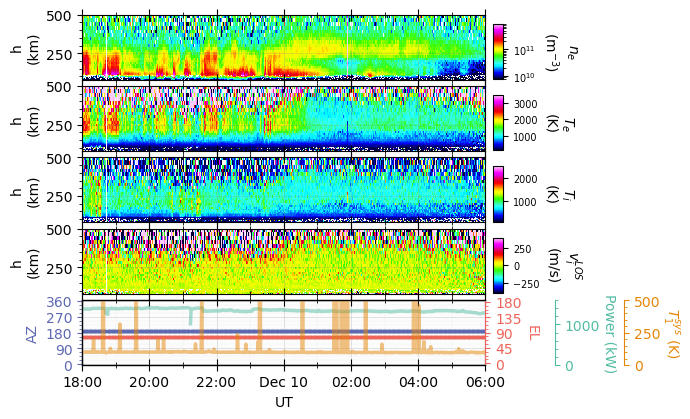

In [30]:
layout = [[n_e], [T_e], [T_i], [v_i], [az, [el], [ptx], [tsys]]]
dashboard.set_layout(panel_layouts=layout, )
dashboard.draw()

### Utilities.


#### Add a title

In [31]:
dashboard.add_title()

#### Add panel labels

In [32]:
dashboard.add_panel_labels()

#### Add verticle lines and shadings as indicators

In [33]:
# add vertical lines
dt_fr_2 = datetime.datetime.strptime('20201209' + '2030', "%Y%m%d%H%M")
dt_to_2 = datetime.datetime.strptime('20201210' + '0130', "%Y%m%d%H%M")
dashboard.add_vertical_line(dt_fr_2, bottom_extend=0, top_extend=0.02, label='Line 1', label_position='top')
# add shading
dashboard.add_shading(dt_fr_2, dt_to_2, bottom_extend=0, top_extend=0.02, label='Shading 1', label_position='top')
# add top bar
dt_fr_3 = datetime.datetime.strptime('20201210' + '0130', "%Y%m%d%H%M")
dt_to_3 = datetime.datetime.strptime('20201210' + '0430', "%Y%m%d%H%M")
dashboard.add_top_bar(dt_fr_3, dt_to_3, bottom=0., top=0.02, label='Top bar 1')

### List all the datasets

In [34]:
dashboard.list_sourced_datasets()

data_sources
|---CDAWEB
|---|---OMNI
|---|---|---Required inputs when load_mode="AUTO": ['datasource_contents', 'omni_type', 'omni_res']
|---|---|---datasource_contents: ['cdaweb', 'omni']
|---|---DMSP
|---|---|---SSUSI
|---|---|---|---EDR_AUR
|---|---|---|---|---Required inputs when load_mode="AUTO": ['datasource_contents']
|---|---|---|---|---datasource_contents: ['cdaweb', 'dmsp', 'ssusi', 'edr_aur']
|---SUPERDARN
|---|---POTMAP
|---|---|---Required inputs when load_mode="AUTO": ['datasource_contents']
|---|---|---datasource_contents: ['superdarn', 'potmap']
|---SUPERMAG
|---|---MAGNETOMETER
|---|---|---Required inputs when load_mode="AUTO": ['datasource_contents']
|---|---|---datasource_contents: ['supermag', 'magnetometer']
|---|---INDICES
|---|---|---Required inputs when load_mode="AUTO": ['datasource_contents']
|---|---|---datasource_contents: ['supermag', 'indices']
|---TUD
|---|---SWARM
|---|---|---DNS_ACC
|---|---|---|---Required inputs when load_mode="AUTO": ['datasource_con